# United States of America - Appliances Store Sales Analysis

## Business Understanding

1. What is the problem that we are trying to solve?<br>
      a. Seek for Clarification<br>
      b. Getting stakeholder “buy-in” and support<br>
      c. What are the goals & objectives?<br>
    <ul>  
    <li>Track the sales performance of year 2019</li>
    <li>Review the data and identify inefficiencies</li>
    </ul>

## Analytic Approach
  1. Select an analytic approach based on type of question:<br>
      a. What was the best month for sales? How much was earned that month?<br>
      b. What city had the highest number of sales and quantity ordered?<br>
      c. What time should we run advertisements to maximize likelihood of customer's buying product?<br>
      d. What products are most often sold together?<br>
      e. What product sold the most? Why do you think it sold the most?<br><br>
  2. Which analytic approach to pick? <b>Descriptive Analytics</b>

## Data Requirements

1. What are the data requirements?<br>
    • Content covering all aspects of each customers purchase history.<br>
    • Content, formats, representations suitable for descriptive analysis.<br>

## Data Collection



In [1]:
# Turn off warnings

import warnings
warnings.filterwarnings('ignore')

#### Task: Import libraries

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#### Task: Display the files from the data folder

In [3]:
# Reference: https://realpython.com/working-with-files-in-python/#:~:text=To%20get%20a%20list%20of,x.

from pathlib import Path

files = Path('datasets/')

for file in files.iterdir():
    print(file.name)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


#### Task: Display the files from the data folder (Alternative Method)

In [4]:
files = [file for file in os.listdir('datasets/')]

for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


#### Read a sample 1 month data

In [5]:
df = pd.read_csv("datasets/Sales_January_2019.csv")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


#### Task: Merge 12 months of data into a single CSV file

In [6]:
# Reference: https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory

path = "datasets/"
files = [file for file in os.listdir(path) if not file.startswith('.')] #Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path + "/" + file)
    all_months_data = pd.concat([all_months_data, current_data])

In [7]:
# Save the csv file in Merged Data folder
all_months_data.to_csv("merged_data/all_data.csv", index=False)

## Data Understanding

#### Task: Read data in updated dataframe

In [8]:
all_data = pd.read_csv("merged_data/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [9]:
all_data.describe(include="all")

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## Data Preparation

The first step in this is figuring out what we need to clean. I have found in practice that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data.

#### Task: Find NaN and display rows

In [10]:
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


#### Task: Drop NaN rows

In [11]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [12]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [13]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task: Get rid of text in order date column

In [14]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Task: Format data type

In [15]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns

#### Task: Add month column

In [16]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task: Add month column (Alternative method)

In [17]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,4


#### Task: Drop additional month column

In [18]:
all_data.drop('Month 2', inplace=True, axis=1)
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### Task: Add city column

In [19]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()                                                    

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA)


#### Task: Add a sales column

In [20]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99


#### Task: Add hour, minute columns

In [21]:
all_data['Hour'] = pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute
all_data['Count'] = 1
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas (TX),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston (MA),99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,9,27,1


## Data Modelling

#### Question 1: What was the best month for sales? How much was earned that month? 

In [22]:
all_data['Sales'] = all_data['Quantity Ordered'].astype('int') * all_data['Price Each'].astype('float')

In [23]:
all_data.groupby(['Month'])[["Quantity Ordered","Sales"]].sum()

,Quantity Ordered,Sales
Month,,
1,10903,1.822257e+06
2,13449,2.202022e+06
3,17005,2.807100e+06
4,20558,3.390670e+06
5,18667,3.152607e+06
6,15253,2.577802e+06
7,16072,2.647776e+06
8,13448,2.244468e+06
9,13109,2.097560e+06


range(1, 13)


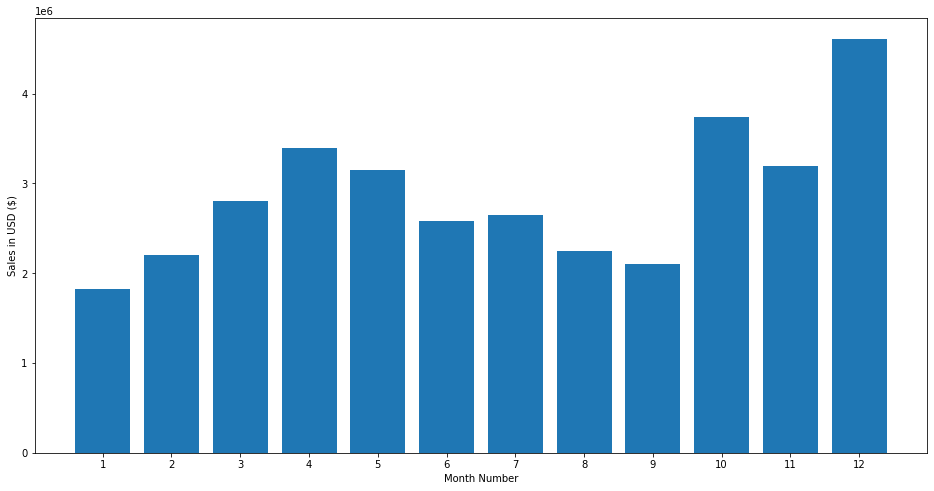

In [24]:
months = range(1,13)
print(months)

plt.rc('figure', figsize=(16, 8))
plt.bar(months, all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

range(1, 13)


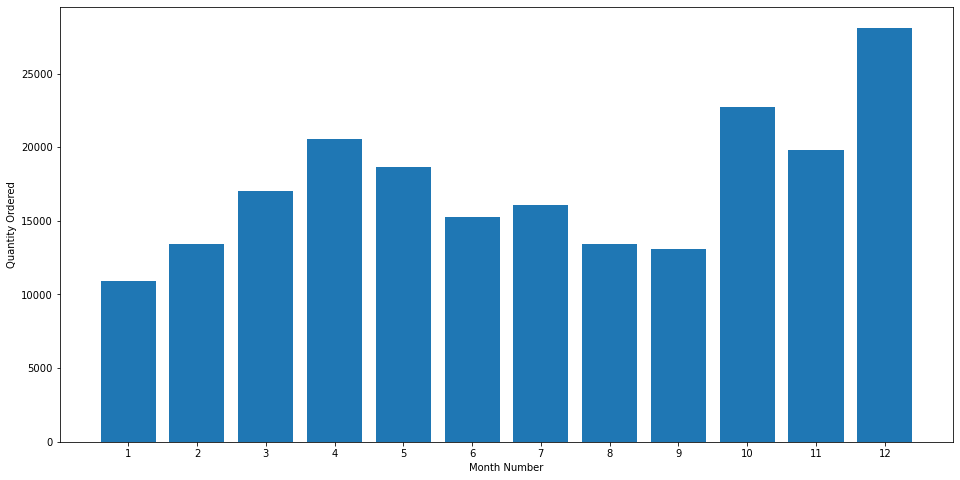

In [25]:
months = range(1,13)
print(months)

plt.bar(months, all_data.groupby(['Month']).sum()['Quantity Ordered'])
plt.xticks(months)
plt.ylabel('Quantity Ordered')
plt.xlabel('Month Number')
plt.show()

##### December is the best month with over 4.6M in total sales and over 25k of quantity sold

#### Question 2: What city had the highest number of sales and quantity ordered?

In [26]:
all_data.groupby(['City'])[["Quantity Ordered","Sales"]].sum()

,Quantity Ordered,Sales
City,,
Atlanta (GA),16602,2.795499e+06
Austin (TX),11153,1.819582e+06
Boston (MA),22528,3.661642e+06
Dallas (TX),16730,2.767975e+06
Los Angeles (CA),33289,5.452571e+06
New York City (NY),27932,4.664317e+06
Portland (ME),2750,4.497583e+05
Portland (OR),11303,1.870732e+06
San Francisco (CA),50239,8.262204e+06


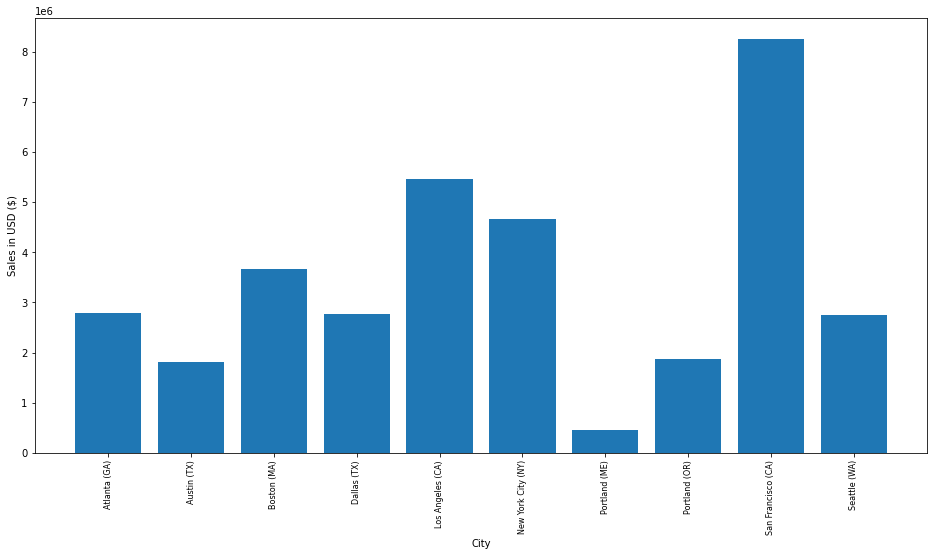

In [27]:
keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

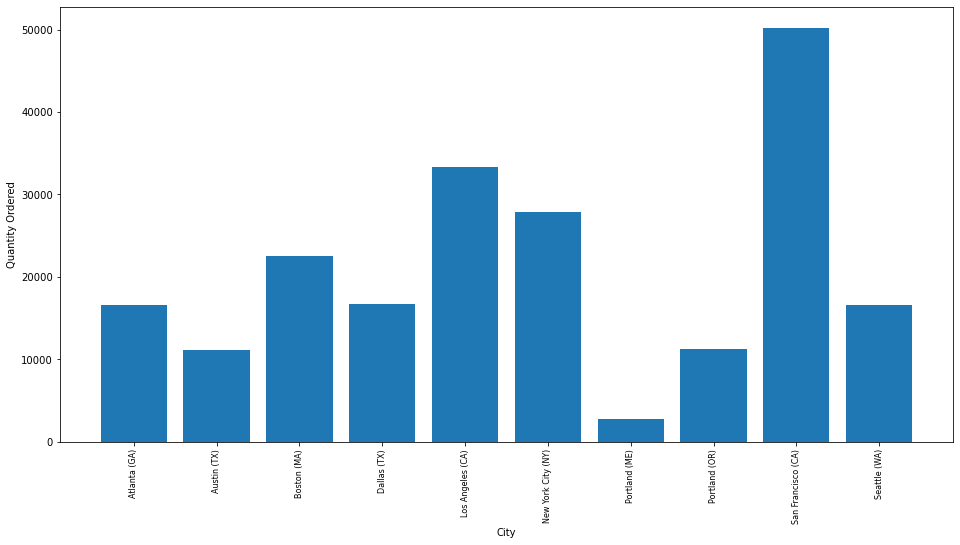

In [28]:
keys = [city for city, df in all_data.groupby(['City'])]

plt.bar(keys,all_data.groupby(['City']).sum()['Quantity Ordered'])
plt.ylabel('Quantity Ordered')
plt.xlabel('City')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

##### San Francisco, California has the highest amount of sales and quantity sold

#### Question 3: What time should we run  advertisements to maximize likelihood of customer's buying product?

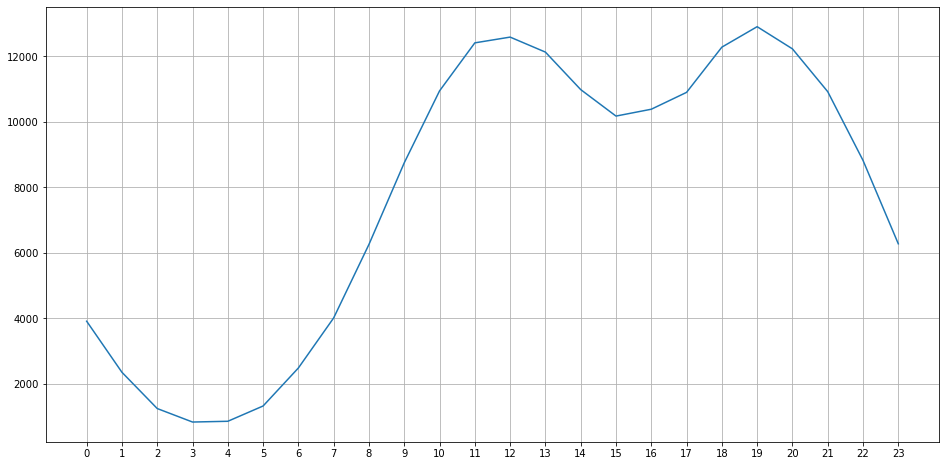

In [29]:
keys = [pair for pair, df in all_data.groupby(['Hour'])]

plt.plot(keys, all_data.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.grid()
plt.show()

##### My recommendation is around 11AM or 7PM

#### Question 4: What products are most often sold together?

#### Task: Check for duplicate Order Id

In [30]:
# Reference: https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time

df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA),11.99,14,38,1
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),600.00,19,42,1
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,Los Angeles (CA),11.95,19,42,1
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99,11,31,1
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,Boston (MA),99.99,11,31,1
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,San Francisco (CA),5.98,17,0,1
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,San Francisco (CA),600.00,17,0,1
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,New York City (NY),14.95,11,7,1
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,New York City (NY),11.95,11,7,1


#### Task: Create a column and group the orders

In [31]:
# Reference: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

df['Ordered'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Ordered']].drop_duplicates()
df2.head()

,Order ID,Ordered
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


#### Task: Count top products that were sold together 

In [32]:
# Reference: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary

from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Ordered']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
count

Counter({('Google Phone', 'Wired Headphones'): 414,
         ('Google Phone', 'USB-C Charging Cable'): 987,
         ('Bose SoundSport Headphones', 'Bose SoundSport Headphones'): 27,
         ('AAA Batteries (4-pack)', 'Google Phone'): 11,
         ('Lightning Charging Cable', 'USB-C Charging Cable'): 58,
         ('Apple Airpods Headphones', 'ThinkPad Laptop'): 9,
         ('Bose SoundSport Headphones', 'AAA Batteries (4-pack)'): 37,
         ('34in Ultrawide Monitor', 'Google Phone'): 2,
         ('iPhone', 'Lightning Charging Cable'): 1005,
         ('Google Phone', 'Bose SoundSport Headphones'): 220,
         ('Bose SoundSport Headphones', 'Wired Headphones'): 53,
         ('AAA Batteries (4-pack)', '27in FHD Monitor'): 22,
         ('USB-C Charging Cable', 'AAA Batteries (4-pack)'): 45,
         ('iPhone', 'Wired Headphones'): 447,
         ('iPhone', '27in 4K Gaming Monitor'): 6,
         ('ThinkPad Laptop', 'AAA Batteries (4-pack)'): 16,
         ('iPhone', 'Apple Airpods Headph

#### Task: Display top 10 most sold products together

In [33]:
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


##### More people buy iPhone with lightning charging cable

#### Question 5: What product sold the most? Why do you think it sold the most?

In [34]:
product_group = all_data.groupby('Product')[["Quantity Ordered","Sales"]]
product_group.sum()

,Quantity Ordered,Sales
Product,,
20in Monitor,4129,454148.71
27in 4K Gaming Monitor,6244,2435097.56
27in FHD Monitor,7550,1132424.50
34in Ultrawide Monitor,6199,2355558.01
AA Batteries (4-pack),27635,106118.40
AAA Batteries (4-pack),31017,92740.83
Apple Airpods Headphones,15661,2349150.00
Bose SoundSport Headphones,13457,1345565.43
Flatscreen TV,4819,1445700.00


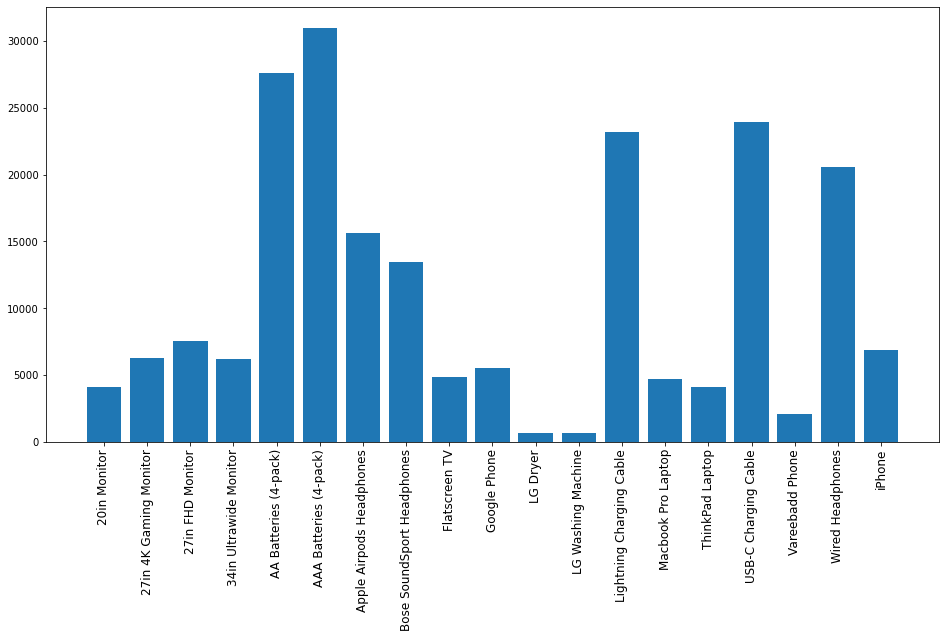

In [35]:
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=12)
plt.show()

##### AAA Batteries is the most sold because it is cheap but as a Data Scientist our job is to prove our hypothesis.

#### Task: Display the mean prices per products and overlaying a second y-axis

In [36]:
prices = all_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


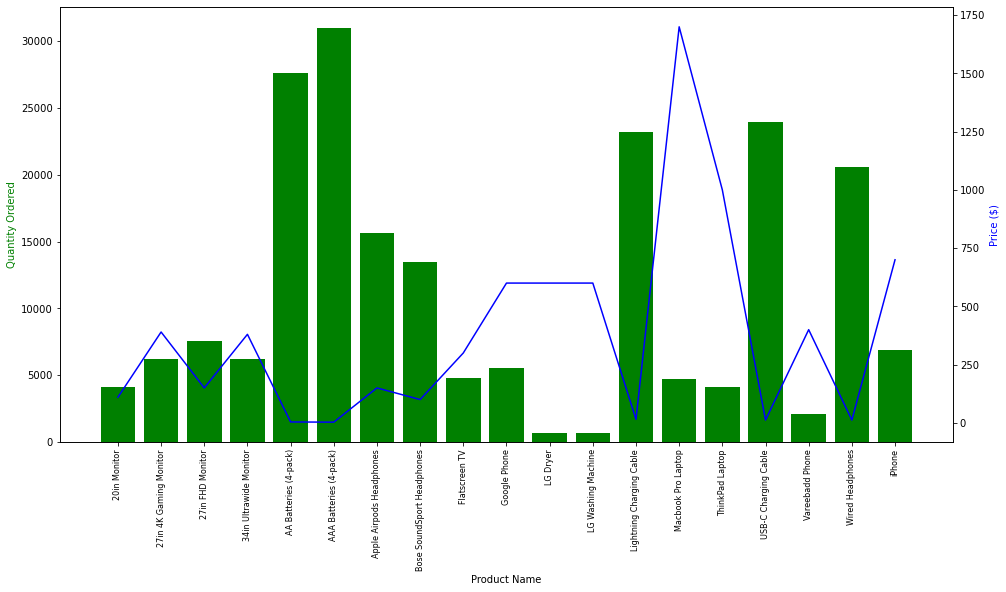

In [37]:
# Reference: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

##### Whenever the quantity ordered is high, the price is also low